In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import pandas as pd
from REMclust import REM

### Example 1
Here, the Reinforced EM algorithm is applied to cluster the Glass Identification dataset from UCI: https://www.kaggle.com/datasets/uciml/glass?datasetId=738&sortBy=voteCount. The glass dataset comprises 9 features, where the first feature represents the refractive index, followed by weight percentages of the chemical elements Na, Mg, Al, Si, K, Ca, Ba, and Fe. Different compositions of these elements in glass result in different types of glass. The ground truth labels of the dataset consist of 7 labels. 

##### Load glass dataset

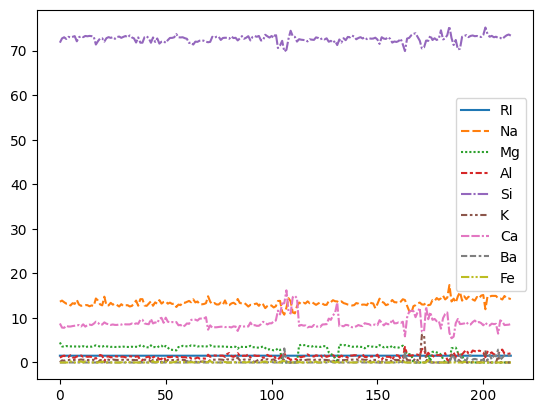

In [2]:
df = pd.read_csv('Data/glass.csv')
# plt.figure(figsize=(3,3))
sns.lineplot(data=df.drop(['Type'], axis=1))
plt.show()

X = df[df.columns[:-1]]    
X = np.array(X)

#### Standardize the dataset for fair analysis

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
n_samples, n_features = X_scaled.shape

#### Applying REM algorithm 

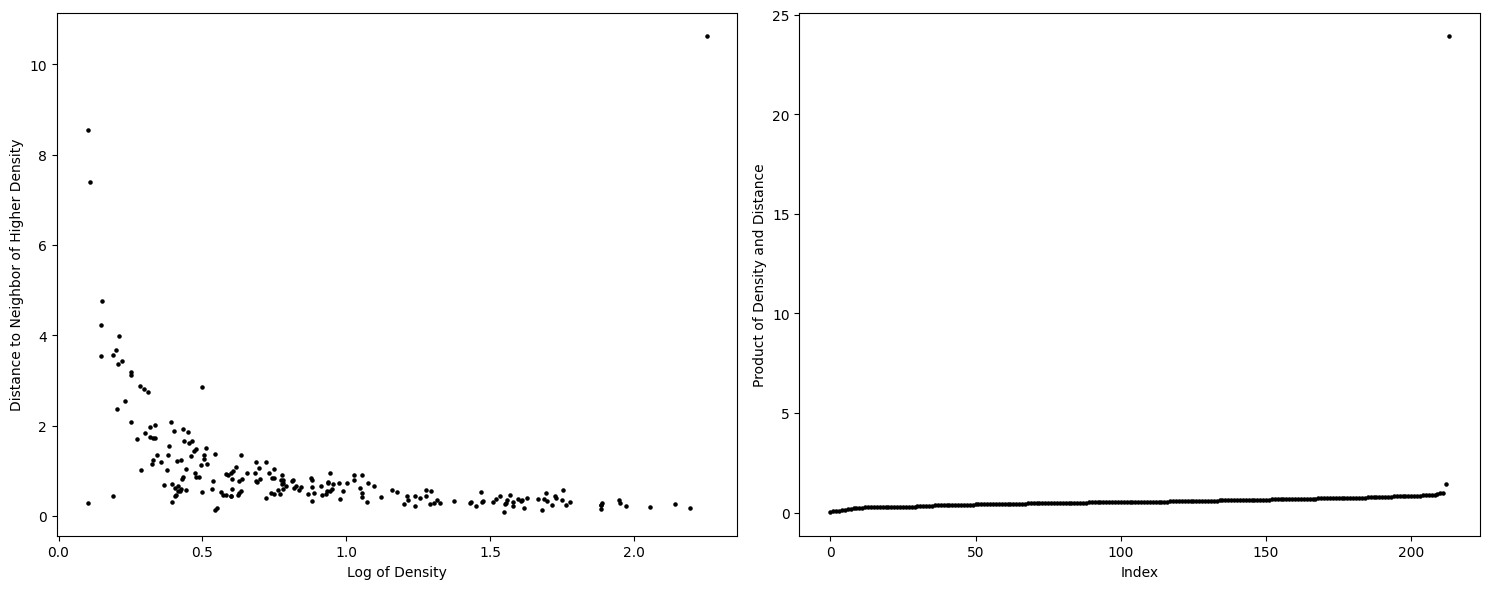

In [4]:
bndwk = int(np.floor(np.min((30, np.sqrt(n_samples)))))
Cluster = REM(data=X_scaled, covariance_type = "full", criteria = "all", bandwidth = bndwk, tol = 1e-4)
Cluster.mode_decision_plot()

In [5]:
Cluster.fit(density_threshold = 1.0, distance_threshold = 0.65)
yp = Cluster.get_labels(mixture_selection='aic')

7 modes selected.


#### Plotting the clustered dataset

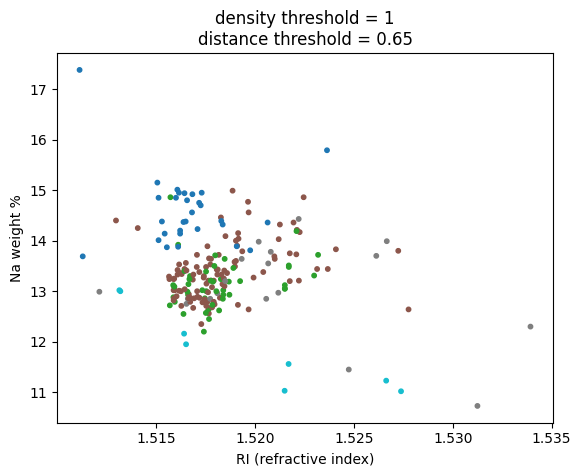

In [6]:
plt.scatter(X[:, 0], X[:, 1], s = 10, c = yp, marker = "o", cmap='tab10')
plt.xlabel('RI (refractive index)')
plt.ylabel('Na weight %')
plt.title('density threshold = 1' + '\n' + 'distance threshold = 0.65')
plt.show()

#### Sensitivity analysis

In [7]:
# NMI & ARI
nmi = metrics.normalized_mutual_info_score(df['Type'].astype(int), yp.astype(int))
ari = metrics.adjusted_rand_score(df['Type'].astype(int), yp.astype(int))
print("Adjusted Rand Score: \t", ari)
print("Normalized Mutual Information Score: \t", nmi)

Adjusted Rand Score: 	 0.1334295601531879
Normalized Mutual Information Score: 	 0.2767939726450728


In [8]:
# sensitivity w.r.t density threshold
n = 5
nmi_x = np.zeros((n))
ari_x = np.zeros((n))
dens_thres = [0.95,1.00,1.05,1.10,1.15]

for i in range(n):
    Cluster.fit(density_threshold = dens_thres[i], 
                distance_threshold = 0.65)
    yp_x = Cluster.get_labels(mixture_selection='aic')
    nmi_x[i] = metrics.normalized_mutual_info_score(df['Type'].astype(int), yp_x.astype(int))
    ari_x[i] = metrics.adjusted_rand_score(df['Type'].astype(int), yp_x.astype(int))

9 modes selected.
7 modes selected.
4 modes selected.
1 modes selected.
1 modes selected.


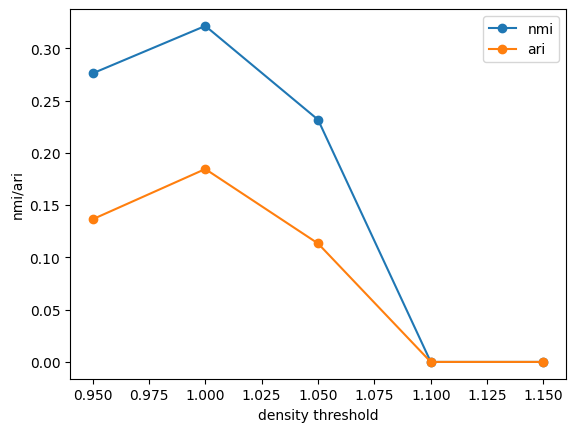

In [9]:
plt.plot(dens_thres, nmi_x, marker = 'o', label='nmi')
plt.plot(dens_thres, ari_x, marker = 'o', label='ari')
plt.xlabel('density threshold')
plt.ylabel('nmi/ari')
plt.legend()
plt.show()

In [10]:
# sensitivity w.r.t distance threshold
n = 5
nmi_x = np.zeros((n))
ari_x = np.zeros((n))
dist_thres = [0.60,0.65,0.70,0.75,0.80]

for i in range(n):
    Cluster.fit(density_threshold = 1.0, 
                distance_threshold = dist_thres[i])
    yp_x = Cluster.get_labels(mixture_selection='aic')
    nmi_x[i] = metrics.normalized_mutual_info_score(df['Type'].astype(int), yp_x.astype(int))
    ari_x[i] = metrics.adjusted_rand_score(df['Type'].astype(int), yp_x.astype(int))

8 modes selected.
7 modes selected.
6 modes selected.
4 modes selected.
3 modes selected.


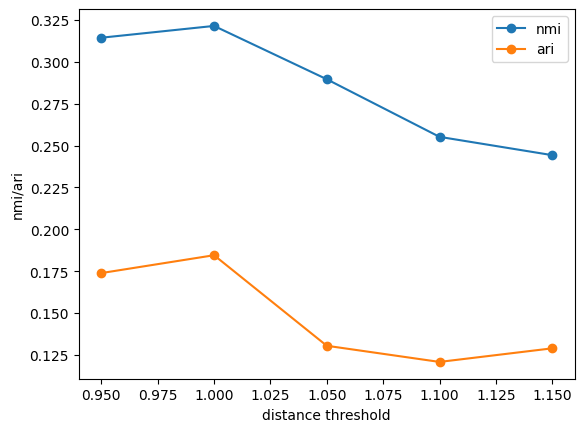

In [11]:
plt.plot(dens_thres, nmi_x, marker = 'o', label='nmi')
plt.plot(dens_thres, ari_x, marker = 'o', label='ari')
plt.xlabel('distance threshold')
plt.ylabel('nmi/ari')
plt.legend()
plt.show()